## Load Stuff

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
np.set_printoptions(precision=2) 
np.set_printoptions(linewidth=160)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w", 'bbox_inches': 'tight'}

from matplotlib.font_manager import FontProperties


import pickle
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'
from IPython.display import Markdown


In [2]:
import torch
from mario_gpt import MarioDataset, MarioLM, TrainingConfig, MarioGPTTrainer
from mario_gpt.utils import view_level, convert_level_to_png, join_list_of_list, characterize
from mario_gpt.fos_dataset import FosDataset

from IPython.display import clear_output

### Load Model

In [7]:
fos_lm = MarioLM(lm_path="../FosGPT_wfc0/iteration_19999", tokenizer_path="../FosGPT_wfc0")

Using ../FosGPT_wfc0/iteration_19999 lm
Using ../FosGPT_wfc0 tokenizer


In [25]:
img_length = 35

prompts = [" "]
generated_level = mario_lm.sample(
    prompts=prompts,
    num_steps=(28*img_length),
    temperature=1.0,
    use_tqdm=True,
    height=35,
)
clear_output()

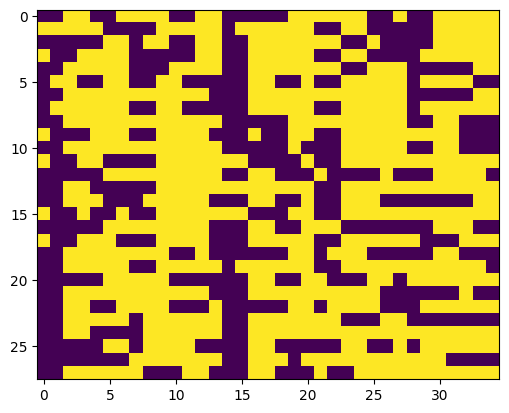

In [27]:
A = np.reshape(generated_level.level_tensor, [28, 35])
plt.imshow(A==36)

In [29]:
from mario_gpt.fos_dataset import FosDataset
dataset = FosDataset(mario_lm.tokenizer, level_string='/home/gaiera/Code/NZB/tile_gen/data/fos_wfc.json') # for token conversion

/home/gaiera/Code/NZB/mario-gpt/mario_gpt/fos_dataset.py:119: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  str_arr = flip_and_transpose(np.array(characterize(level)))
Token indices sequence length is longer than the specified maximum sequence length for this model (2940000 > 1024). Running this sequence through the model will result in indexing errors


wait


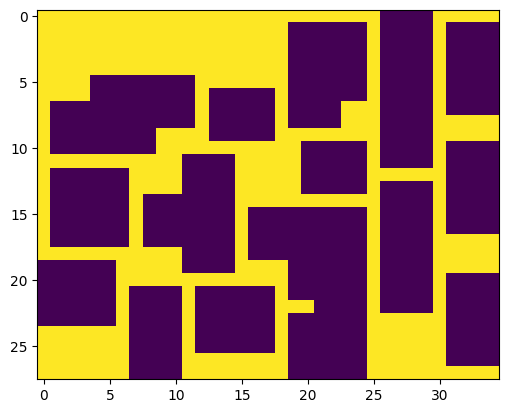

In [41]:
B = np.reshape(dataset.level_tensors[0], [28, 35])
plt.imshow(B==40)